# Imports

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import random as rn
import seaborn as sb
sb.set_style(style="whitegrid")
sb.set_color_codes()
import scipy.ndimage
from scipy.interpolate import griddata
import numpy.ma as ma
from numpy.random import uniform, seed
from google.colab import files

# Single Blob

## Data Preparation


### Data Generation

In [ ]:
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance
Nobjs = 500
np.random.seed(1)
x, y = np.random.multivariate_normal(mean, cov, Nobjs).T
#Add manual outlier
x[0]=3.3
y[0]=3.3
X=np.array([x,y]).T

### Data Visualisation

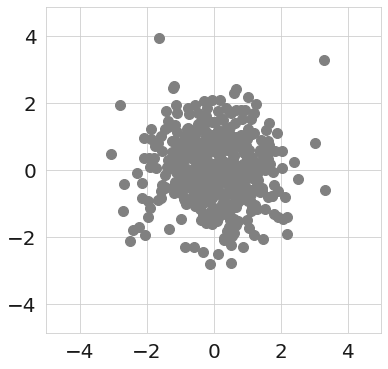

In [ ]:
fig=plt.figure(figsize=(6,6))
fig.add_subplot(111)
plt.plot(X[:,0],X[:,1],'o', markersize=10, color=[0.5,0.5,0.5])
plt.grid("off")
plt.axis("equal")
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.tick_params(direction='out', length=6, width=2, colors='k',labelsize=20)
plt.show()

### Saving in csv 

In [ ]:
label=np.zeros(500, int)
label[0]=1

dict={'1':x, '2':y, 'label':label}
df=pd.DataFrame(dict)

df.to_csv('SingleBlob.csv', sep='\t')
files.download("SingleBlob.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Train iForest on Data

This process is done on local machine.

## Obtain Anomaly Scores

In [ ]:
files.upload()
files.upload()

Saving SingleBlob.csviForestAnomalyScore_0.csv to SingleBlob.csviForestAnomalyScore_0.csv


Saving SingleBlob.csviForestAnomalyScore_1.csv to SingleBlob.csviForestAnomalyScore_1.csv


{'SingleBlob.csviForestAnomalyScore_1.csv': b'pointId Ascore actuallabel\n0 0.758203 1\n1 0.43381 0\n2 0.5489 0\n3 0.491329 0\n4 0.391787 0\n5 0.580816 0\n6 0.398463 0\n7 0.45222 0\n8 0.412805 0\n9 0.398978 0\n10 0.457594 0\n11 0.420794 0\n12 0.417157 0\n13 0.419251 0\n14 0.396525 0\n15 0.404957 0\n16 0.418074 0\n17 0.403734 0\n18 0.41952 0\n19 0.500841 0\n20 0.418162 0\n21 0.497877 0\n22 0.403875 0\n23 0.526216 0\n24 0.396778 0\n25 0.395218 0\n26 0.428153 0\n27 0.400132 0\n28 0.433715 0\n29 0.409336 0\n30 0.445988 0\n31 0.399482 0\n32 0.390876 0\n33 0.509904 0\n34 0.599489 0\n35 0.454635 0\n36 0.408307 0\n37 0.50873 0\n38 0.405807 0\n39 0.404589 0\n40 0.391567 0\n41 0.393915 0\n42 0.387325 0\n43 0.407451 0\n44 0.424823 0\n45 0.426176 0\n46 0.406213 0\n47 0.391281 0\n48 0.393431 0\n49 0.415097 0\n50 0.432451 0\n51 0.403835 0\n52 0.417573 0\n53 0.423226 0\n54 0.393156 0\n55 0.442037 0\n56 0.423356 0\n57 0.443888 0\n58 0.473581 0\n59 0.427899 0\n60 0.405454 0\n61 0.56436 0\n62 0.539959 0

In [ ]:
data = pd.read_csv("SingleBlob.csviForestAnomalyScore_0.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()

data = pd.read_csv("SingleBlob.csviForestAnomalyScore_1.csv", delimiter=' ')
S1 = data['Ascore'].to_numpy()

print(np.min(S0))
print(np.max(S0))

0.403974
0.789196


### Visualise scores

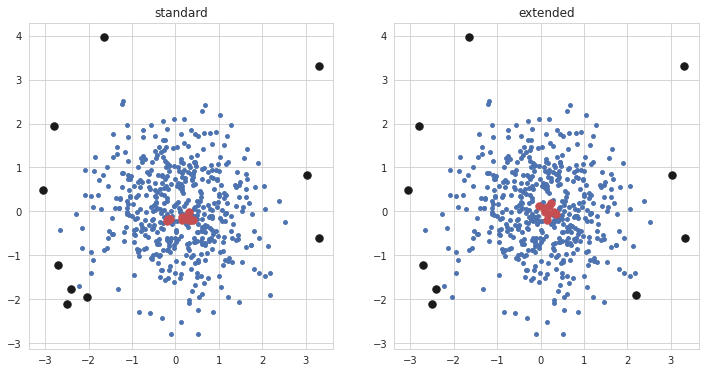

In [ ]:
ss0=np.argsort(S0)
ss1=np.argsort(S1)

f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x,y,s=15,c='b',edgecolor='b')
plt.scatter(x[ss0[-10:]],y[ss0[-10:]],s=55,c='k')
plt.scatter(x[ss0[:10]],y[ss0[:10]],s=55,c='r')
plt.title('standard')

plt.subplot(1,2,2)
plt.scatter(x,y,s=15,c='b',edgecolor='b')
plt.scatter(x[ss1[-10:]],y[ss1[-10:]],s=55,c='k')
plt.scatter(x[ss1[:10]],y[ss1[:10]],s=55,c='r')
plt.title('extended')
plt.show()

# print(ss0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


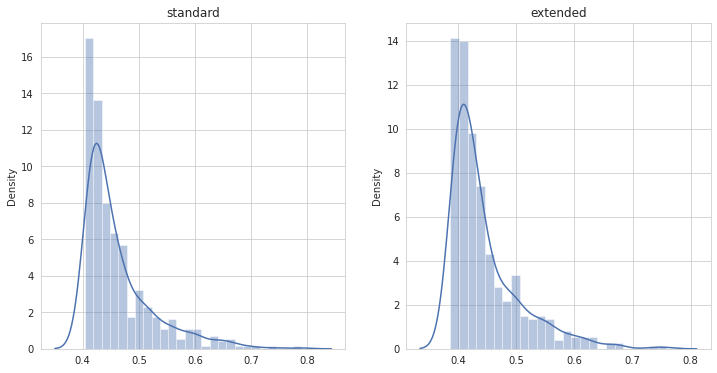

In [ ]:
f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.distplot(S0, kde=True, color="b")
plt.title('standard')

plt.subplot(1,2,2)
sb.distplot(S1, kde=True, color="b")
plt.title('extended')
plt.show()

## Score Maps

In [ ]:
xx, yy = np.meshgrid(np.linspace(-5., 5., 30), np.linspace(-5., 5, 30))
X_in=np.c_[xx.ravel(), yy.ravel()]

label=np.zeros(900, int)

dict={'1':X_in[:, 0], '2':X_in[:, 1], 'label':label}
df=pd.DataFrame(dict)

df.to_csv('SingleBlob_heatmap.csv', sep='\t')
files.download("SingleBlob_heatmap.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.upload()
files.upload()



Saving SingleBlob_heatmap.csviForestAnomalyScore_0.csv to SingleBlob_heatmap.csviForestAnomalyScore_0.csv


Saving SingleBlob_heatmap.csviForestAnomalyScore_1.csv to SingleBlob_heatmap.csviForestAnomalyScore_1.csv


{'SingleBlob_heatmap.csviForestAnomalyScore_1.csv': b'pointId Ascore actuallabel\n0 0.726274 0\n1 0.722984 0\n2 0.724706 0\n3 0.724954 0\n4 0.718137 0\n5 0.713693 0\n6 0.70947 0\n7 0.700812 0\n8 0.699974 0\n9 0.70028 0\n10 0.699516 0\n11 0.690893 0\n12 0.682467 0\n13 0.686288 0\n14 0.682285 0\n15 0.682113 0\n16 0.680722 0\n17 0.679857 0\n18 0.677366 0\n19 0.691097 0\n20 0.695998 0\n21 0.700888 0\n22 0.700948 0\n23 0.707031 0\n24 0.698862 0\n25 0.700262 0\n26 0.710585 0\n27 0.706495 0\n28 0.705341 0\n29 0.70766 0\n30 0.727321 0\n31 0.724445 0\n32 0.722836 0\n33 0.721993 0\n34 0.720013 0\n35 0.713244 0\n36 0.710026 0\n37 0.702711 0\n38 0.696989 0\n39 0.693936 0\n40 0.69818 0\n41 0.689441 0\n42 0.684082 0\n43 0.680576 0\n44 0.682009 0\n45 0.677702 0\n46 0.677024 0\n47 0.674661 0\n48 0.672705 0\n49 0.685276 0\n50 0.697363 0\n51 0.698821 0\n52 0.698942 0\n53 0.697109 0\n54 0.697757 0\n55 0.699323 0\n56 0.703947 0\n57 0.705017 0\n58 0.705001 0\n59 0.709548 0\n60 0.725388 0\n61 0.72549 0\n62 

In [ ]:
data = pd.read_csv("SingleBlob_heatmap.csviForestAnomalyScore_0.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()
S0 = S0.reshape(xx.shape)

data = pd.read_csv("SingleBlob_heatmap.csviForestAnomalyScore_1.csv", delimiter=' ')
S1 = data['Ascore'].to_numpy()
S1 = S1.reshape(xx.shape)

print(np.min(S0))
print(np.max(S0))

0.39806
0.803575


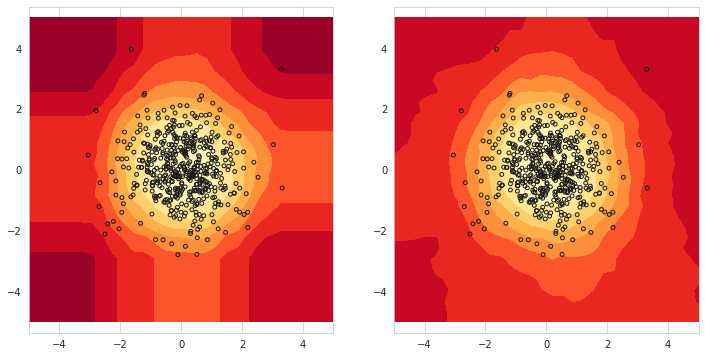

In [ ]:
f = plt.figure(figsize=(12,6))

ax1 = f.add_subplot(121)
levels = np.linspace(np.min(S0),np.max(S0),10)
CS = ax1.contourf(xx, yy, S0, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")


ax2 = f.add_subplot(122)
levels = np.linspace(np.min(S1),np.max(S0),10)
CS = ax2.contourf(xx, yy, S1, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")


plt.show()

# Multiple Blobs

## Data Preparation

### Data Generation

In [ ]:
mean1 = [10, 0]
cov1 = [[1, 0], [0, 1]]  

mean2 = [0, 10]
cov2 = [[1, 0], [0, 1]]

Nobjs = 500          # Size of dataset.
np.random.seed(1)    # Add this for repeatablilty of the experiment. 

x1, y1 = np.random.multivariate_normal(mean1, cov1, int(Nobjs/2)).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, int(Nobjs/2)).T

# join the two clusters so as to make one dataset. 
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))
X=np.array([x,y]).T

### Data Visualisation

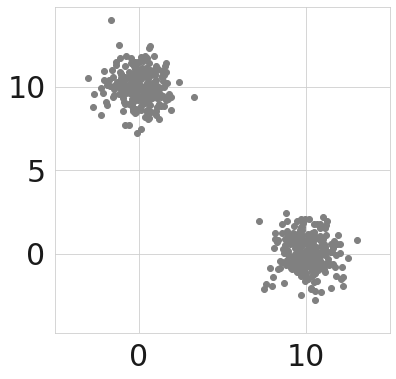

In [ ]:
fig=plt.figure(figsize=(6,6))
fig.add_subplot(111)
plt.plot(X[:,0],X[:,1],'o', color=[0.5,0.5,0.5])
plt.grid("off")
plt.axis("equal")

plt.xlim([-5,15])
plt.ylim([-5,15])
plt.tick_params(direction='out', length=6, width=2, colors='k',labelsize=30)

plt.show()

### Save in csv


In [ ]:
label=np.zeros(500, int)
label[0]=1

dict={'1':x, '2':y, 'label':label}
df=pd.DataFrame(dict)

df.to_csv('MultipleBlob.csv', sep='\t')
files.download("MultipleBlob.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Train iForest on Data

This part is done on local machine

## Obtain Anomaly Scores

In [ ]:
files.upload()
files.upload()

Saving MultipleBlob.csviForestAnomalyScore_0.csv to MultipleBlob.csviForestAnomalyScore_0.csv


Saving MultipleBlob.csviForestAnomalyScore_1.csv to MultipleBlob.csviForestAnomalyScore_1.csv


{'MultipleBlob.csviForestAnomalyScore_1.csv': b'pointId Ascore actuallabel\n0 0.492094 1\n1 0.461879 0\n2 0.577299 0\n3 0.516341 0\n4 0.413491 0\n5 0.590068 0\n6 0.422935 0\n7 0.483457 0\n8 0.435847 0\n9 0.430095 0\n10 0.480727 0\n11 0.445286 0\n12 0.441962 0\n13 0.440046 0\n14 0.429453 0\n15 0.432439 0\n16 0.451191 0\n17 0.435918 0\n18 0.460646 0\n19 0.507305 0\n20 0.436635 0\n21 0.4961 0\n22 0.423945 0\n23 0.524127 0\n24 0.431367 0\n25 0.417972 0\n26 0.463896 0\n27 0.430455 0\n28 0.454564 0\n29 0.439187 0\n30 0.462608 0\n31 0.421215 0\n32 0.417102 0\n33 0.515959 0\n34 0.587257 0\n35 0.498029 0\n36 0.440297 0\n37 0.524397 0\n38 0.433029 0\n39 0.435607 0\n40 0.419328 0\n41 0.426332 0\n42 0.414793 0\n43 0.441504 0\n44 0.450838 0\n45 0.454172 0\n46 0.426648 0\n47 0.418034 0\n48 0.423932 0\n49 0.440636 0\n50 0.457179 0\n51 0.430069 0\n52 0.459125 0\n53 0.45018 0\n54 0.423419 0\n55 0.478601 0\n56 0.449165 0\n57 0.46287 0\n58 0.493714 0\n59 0.45016 0\n60 0.429633 0\n61 0.558213 0\n62 0.5478

In [ ]:
data = pd.read_csv("MultipleBlob.csviForestAnomalyScore_0.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()

data = pd.read_csv("MultipleBlob.csviForestAnomalyScore_1.csv", delimiter=' ')
S1 = data['Ascore'].to_numpy()

print(S0)
print(S0)

[0.517959 0.479168 0.603644 0.535548 0.426639 0.611965 0.432651 0.501763
 0.448227 0.435651 0.486281 0.447765 0.459796 0.451316 0.432529 0.445885
 0.466587 0.447068 0.464389 0.522822 0.450243 0.507179 0.436888 0.557338
 0.437293 0.429702 0.47007  0.432818 0.462048 0.452415 0.475891 0.432087
 0.428969 0.524861 0.616694 0.503606 0.449499 0.55045  0.442235 0.444314
 0.429245 0.432782 0.437387 0.441042 0.456278 0.463274 0.44209  0.428633
 0.436312 0.447747 0.465359 0.438775 0.468291 0.468659 0.43488  0.490674
 0.466285 0.485145 0.521568 0.457223 0.443122 0.581646 0.560562 0.497916
 0.478174 0.438061 0.474145 0.447701 0.471326 0.437271 0.429528 0.457126
 0.434703 0.437726 0.446242 0.615772 0.591736 0.427642 0.430722 0.465917
 0.470819 0.433762 0.426052 0.452688 0.651018 0.450863 0.616746 0.427167
 0.481389 0.434867 0.477    0.475468 0.435273 0.433866 0.430222 0.458096
 0.560106 0.524008 0.432553 0.471762 0.443822 0.528031 0.581432 0.546298
 0.551482 0.509074 0.470211 0.482863 0.437132 0.478

### Visualise Scores

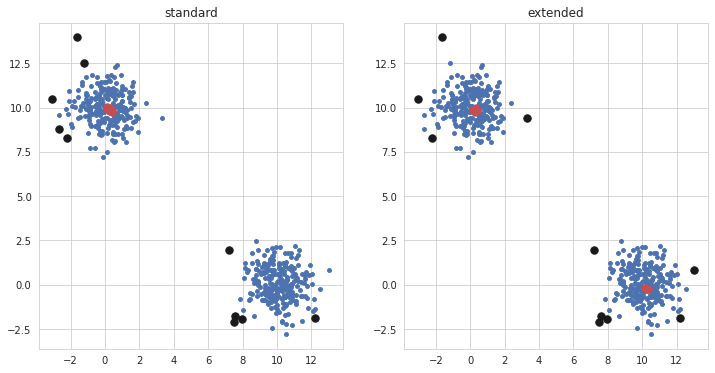

In [ ]:
ss0=np.argsort(S0)
ss1=np.argsort(S1)

f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x,y,s=15,c='b',edgecolor='b')
plt.scatter(x[ss0[-10:]],y[ss0[-10:]],s=55,c='k')
plt.scatter(x[ss0[:10]],y[ss0[:10]],s=55,c='r')
plt.title('standard')

plt.subplot(1,2,2)
plt.scatter(x,y,s=15,c='b',edgecolor='b')
plt.scatter(x[ss1[-10:]],y[ss1[-10:]],s=55,c='k')
plt.scatter(x[ss1[:10]],y[ss1[:10]],s=55,c='r')
plt.title('extended')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


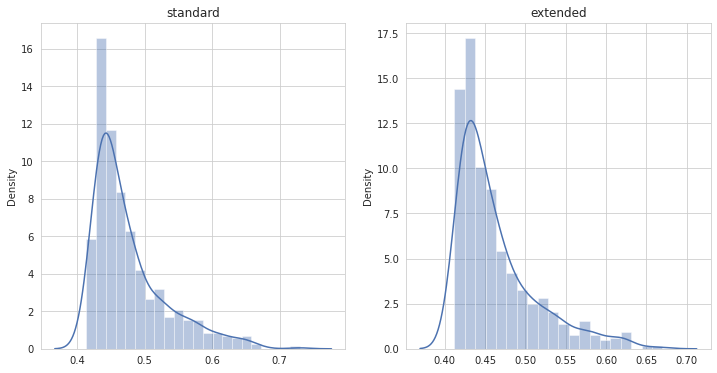

In [ ]:
f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.distplot(S0, kde=True, color="b")
plt.title('standard')

plt.subplot(1,2,2)
sb.distplot(S1, kde=True, color="b")
plt.title('extended')
plt.show()

## Score Map

In [ ]:
xx, yy = np.meshgrid(np.linspace(-5, 15, 30), np.linspace(-5, 15, 30))
X_in=np.c_[xx.ravel(), yy.ravel()]

label=np.zeros(900, int)

dict={'1':X_in[:, 0], '2':X_in[:, 1], 'label':label}
df=pd.DataFrame(dict)

df.to_csv('MultipleBlob_heatmap.csv', sep='\t')
files.download("MultipleBlob_heatmap.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.upload()
files.upload()

Saving heatmap_MultipleBlob.csviForestAnomalyScore_0.csv to heatmap_MultipleBlob.csviForestAnomalyScore_0.csv


Saving heatmap_MultipleBlob.csviForestAnomalyScore_1.csv to heatmap_MultipleBlob.csviForestAnomalyScore_1.csv


{'heatmap_MultipleBlob.csviForestAnomalyScore_1.csv': b'pointId Ascore actuallabel\n0 0.727305 0\n1 0.724469 0\n2 0.724365 0\n3 0.725507 0\n4 0.725642 0\n5 0.724956 0\n6 0.720928 0\n7 0.720236 0\n8 0.718491 0\n9 0.718802 0\n10 0.719142 0\n11 0.712902 0\n12 0.710888 0\n13 0.712288 0\n14 0.708716 0\n15 0.700035 0\n16 0.695087 0\n17 0.693585 0\n18 0.691796 0\n19 0.691577 0\n20 0.685695 0\n21 0.682743 0\n22 0.677643 0\n23 0.671348 0\n24 0.673057 0\n25 0.672768 0\n26 0.678614 0\n27 0.679546 0\n28 0.677469 0\n29 0.676661 0\n30 0.727496 0\n31 0.726494 0\n32 0.726072 0\n33 0.724462 0\n34 0.722558 0\n35 0.722904 0\n36 0.718434 0\n37 0.716337 0\n38 0.715617 0\n39 0.716378 0\n40 0.717812 0\n41 0.714617 0\n42 0.709078 0\n43 0.709214 0\n44 0.703963 0\n45 0.703092 0\n46 0.691064 0\n47 0.686455 0\n48 0.687374 0\n49 0.684312 0\n50 0.678671 0\n51 0.670962 0\n52 0.666553 0\n53 0.654337 0\n54 0.660997 0\n55 0.669917 0\n56 0.676025 0\n57 0.670065 0\n58 0.672465 0\n59 0.674092 0\n60 0.72677 0\n61 0.727954 

In [ ]:
data = pd.read_csv("heatmap_MultipleBlob.csviForestAnomalyScore_0.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()
S0 = S0.reshape(xx.shape)

data = pd.read_csv("heatmap_MultipleBlob.csviForestAnomalyScore_1.csv", delimiter=' ')
S1 = data['Ascore'].to_numpy()
S1 = S1.reshape(xx.shape)

print(np.min(S0))
print(np.max(S0))

0.42807
0.761399


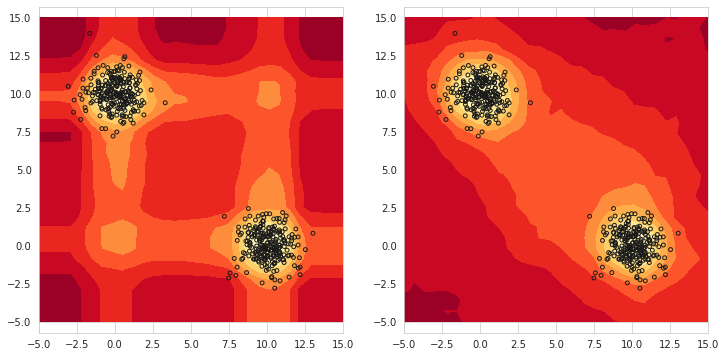

In [ ]:
f = plt.figure(figsize=(12,6))

ax1 = f.add_subplot(121)
levels = np.linspace(np.min(S0),np.max(S0),10)
CS = ax1.contourf(xx, yy, S0, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")


ax2 = f.add_subplot(122)
levels = np.linspace(np.min(S1),np.max(S0),10)
CS = ax2.contourf(xx, yy, S1, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')
plt.axis("equal")


plt.show()

# Sinusoidal Data

## Data Preparation

### Data Generation

In [ ]:
N = 1000
x = np.random.rand(N)*8*np.pi
y = np.sin(x) + np.random.randn(N)/4.
X=np.array([x,y]).T

### Data Visualisation

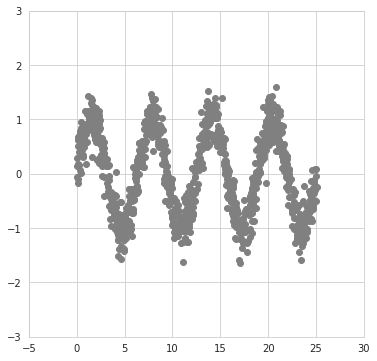

In [ ]:
fig=plt.figure(figsize=(6,6))
fig.add_subplot(111)
plt.plot(X[:,0],X[:,1],'o', color=[0.5,0.5,0.5])

plt.xlim([-5,30])
plt.ylim([-3.,3.])

plt.show()

### Save to csv

In [ ]:
label=np.zeros(1000, int)
label[0]=1

dict={'1':x, '2':y, 'label':label}
df=pd.DataFrame(dict)

df.to_csv('Sinusoidal.csv', sep='\t')
files.download("Sinusoidal.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Train iForest

This process is done on local machine.

## Obtain Anomaly scores

In [ ]:
files.upload()
files.upload()

Saving Sinusoidal.csviForestAnomalyScore_0.csv to Sinusoidal.csviForestAnomalyScore_0.csv


Saving Sinusoidal.csviForestAnomalyScore_1.csv to Sinusoidal.csviForestAnomalyScore_1.csv


{'Sinusoidal.csviForestAnomalyScore_1.csv': b'pointId Ascore actuallabel\n0 0.482778 1\n1 0.482253 0\n2 0.499466 0\n3 0.554439 0\n4 0.48033 0\n5 0.634887 0\n6 0.48823 0\n7 0.489495 0\n8 0.495386 0\n9 0.48609 0\n10 0.570613 0\n11 0.469289 0\n12 0.487488 0\n13 0.472163 0\n14 0.489717 0\n15 0.488364 0\n16 0.489291 0\n17 0.523376 0\n18 0.473226 0\n19 0.548209 0\n20 0.493861 0\n21 0.479372 0\n22 0.552333 0\n23 0.489517 0\n24 0.55982 0\n25 0.502904 0\n26 0.47299 0\n27 0.49633 0\n28 0.52 0\n29 0.47846 0\n30 0.470053 0\n31 0.545006 0\n32 0.488593 0\n33 0.489293 0\n34 0.486935 0\n35 0.483058 0\n36 0.466744 0\n37 0.474923 0\n38 0.530074 0\n39 0.483137 0\n40 0.478795 0\n41 0.51276 0\n42 0.490664 0\n43 0.48186 0\n44 0.479628 0\n45 0.530655 0\n46 0.482795 0\n47 0.494848 0\n48 0.51093 0\n49 0.49915 0\n50 0.574337 0\n51 0.479611 0\n52 0.522277 0\n53 0.474394 0\n54 0.491873 0\n55 0.510752 0\n56 0.494824 0\n57 0.507563 0\n58 0.503111 0\n59 0.490571 0\n60 0.503532 0\n61 0.484897 0\n62 0.483902 0\n63 0.4

In [ ]:
data = pd.read_csv("Sinusoidal.csviForestAnomalyScore_0.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()

data = pd.read_csv("Sinusoidal.csviForestAnomalyScore_1.csv", delimiter=' ')
S1 = data['Ascore'].to_numpy()

print(np.min(S0))
print(np.max(S0))

0.464744
0.670093


### Visualise Scores

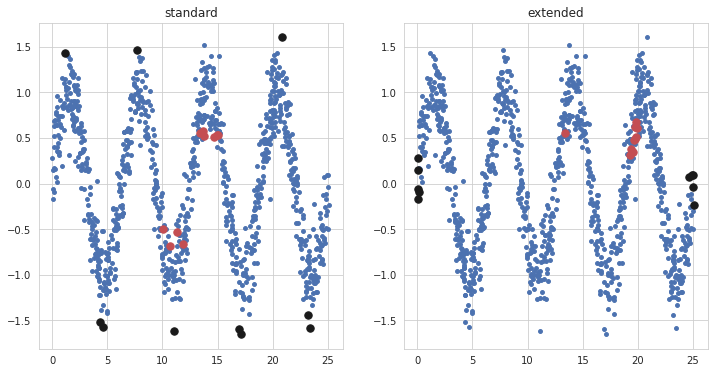

In [ ]:
ss0=np.argsort(S0)
ss1=np.argsort(S1)

f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x,y,s=15,c='b',edgecolor='b')
plt.scatter(x[ss0[-10:]],y[ss0[-10:]],s=55,c='k')
plt.scatter(x[ss0[:10]],y[ss0[:10]],s=55,c='r')
plt.title('standard')

plt.subplot(1,2,2)
plt.scatter(x,y,s=15,c='b',edgecolor='b')
plt.scatter(x[ss1[-10:]],y[ss1[-10:]],s=55,c='k')
plt.scatter(x[ss1[:10]],y[ss1[:10]],s=55,c='r')
plt.title('extended')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


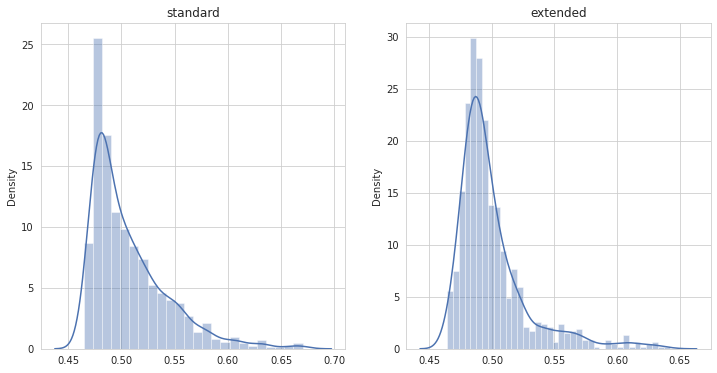

In [ ]:
f = plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sb.distplot(S0, kde=True, color="b")
plt.title('standard')

plt.subplot(1,2,2)
sb.distplot(S1, kde=True, color="b")
plt.title('extended')
plt.show()

## Score Maps

In [ ]:
xx, yy = np.meshgrid(np.linspace(-5, 30, 30), np.linspace(-3, 3, 30))
X_in=np.c_[xx.ravel(), yy.ravel()]

label=np.zeros(900, int)

dict={'1':X_in[:, 0], '2':X_in[:, 1], 'label':label}
df=pd.DataFrame(dict)

df.to_csv('Sinusoidal_heatmap.csv', sep='\t')
files.download("Sinusoidal_heatmap.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.upload()
files.upload()

Saving Sinusoidal_heatmap.csviForestAnomalyScore_0.csv to Sinusoidal_heatmap.csviForestAnomalyScore_0.csv


Saving Sinusoidal_heatmap.csviForestAnomalyScore_1.csv to Sinusoidal_heatmap.csviForestAnomalyScore_1.csv


{'Sinusoidal_heatmap.csviForestAnomalyScore_1.csv': b'pointId Ascore actuallabel\n0 0.675763 0\n1 0.676675 0\n2 0.679461 0\n3 0.675976 0\n4 0.665534 0\n5 0.657853 0\n6 0.641501 0\n7 0.619603 0\n8 0.600045 0\n9 0.602735 0\n10 0.61463 0\n11 0.614648 0\n12 0.604034 0\n13 0.596118 0\n14 0.59485 0\n15 0.61151 0\n16 0.614167 0\n17 0.60066 0\n18 0.604441 0\n19 0.603997 0\n20 0.601593 0\n21 0.610888 0\n22 0.629213 0\n23 0.637108 0\n24 0.648306 0\n25 0.650781 0\n26 0.652049 0\n27 0.656799 0\n28 0.662912 0\n29 0.666498 0\n30 0.678183 0\n31 0.67452 0\n32 0.679627 0\n33 0.675961 0\n34 0.672542 0\n35 0.656945 0\n36 0.640008 0\n37 0.616098 0\n38 0.595916 0\n39 0.600496 0\n40 0.61008 0\n41 0.614881 0\n42 0.598387 0\n43 0.596526 0\n44 0.593864 0\n45 0.607212 0\n46 0.607954 0\n47 0.598054 0\n48 0.599307 0\n49 0.598586 0\n50 0.596091 0\n51 0.609051 0\n52 0.625425 0\n53 0.632083 0\n54 0.644362 0\n55 0.64992 0\n56 0.651661 0\n57 0.657972 0\n58 0.662155 0\n59 0.66572 0\n60 0.677467 0\n61 0.678348 0\n62 0.6

In [ ]:
data = pd.read_csv("Sinusoidal_heatmap.csviForestAnomalyScore_0.csv", delimiter=' ')
S0 = data['Ascore'].to_numpy()
S0 = S0.reshape(xx.shape)

data = pd.read_csv("Sinusoidal_heatmap.csviForestAnomalyScore_1.csv", delimiter=' ')
S1 = data['Ascore'].to_numpy()
S1 = S1.reshape(xx.shape)

print(np.min(S0))
print(np.max(S0))

0.470304
0.715411


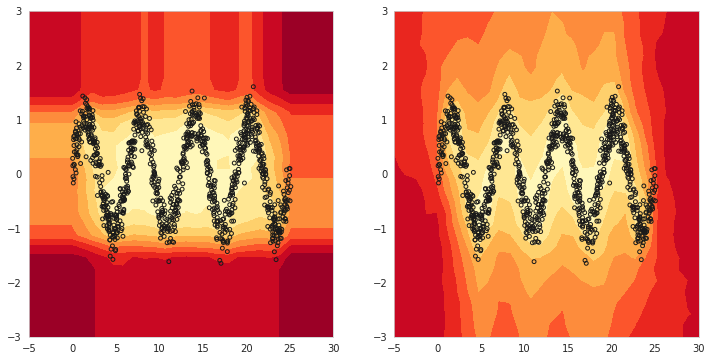

In [ ]:
f = plt.figure(figsize=(12,6))

ax1 = f.add_subplot(121)
levels = np.linspace(np.min(S0),np.max(S0),10)
CS = ax1.contourf(xx, yy, S0, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')


ax2 = f.add_subplot(122)
levels = np.linspace(np.min(S1),np.max(S0),10)
CS = ax2.contourf(xx, yy, S1, levels, cmap=plt.cm.YlOrRd)
plt.scatter(x,y,s=15,c='None',edgecolor='k')


plt.show()